In [26]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
import cv2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm #colormap

In [27]:
# if os.path.isfile('sample.jpg'): im = array(Image.open('sample.jpg'))
img_ref = cv2.imread('marked-images/refre.png',0)
img_act = cv2.imread('marked-images/actual.png',0)

blur_ref = cv2.GaussianBlur(img_ref,(5,5),0)
ret,thresh_ref = cv2.threshold(blur_ref,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur_act = cv2.GaussianBlur(img_act,(5,5),0)
ret,thresh_act = cv2.threshold(blur_act,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


titles = ['Reference Image','Actual Cut line']
images = [thresh_ref, thresh_act]

TypeError: Image data can not convert to float

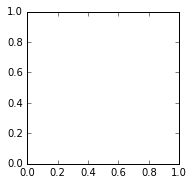

In [29]:
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','OTSU','Gauss_adap']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6]

for i in xrange(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
#     plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [23]:
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(thresh5, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

titles = ['Original Image','OTSU','Gauss_adap','Open', 'open+close']
images = [img, thresh5, thresh6, opening, closing]

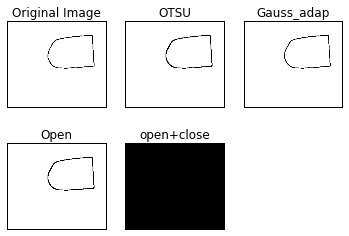

In [5]:
for i in xrange(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [6]:
contours, hierarchy = cv2.findContours(thresh6,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

boundary = np.vstack(contours[1]).squeeze()
np.savetxt('boundary.out', boundary)

In [12]:
cv2.drawContours(img,contours,-1,(255,255,255),1)
cv2.imshow("Contour",img)
cv2.waitKey(0) #use space to kill it.